In [2]:
import mglearn

citibike = mglearn.datasets.load_citibike()
print("Citi Bike Daten: \n{}".format(citibike.head()))

Citi Bike Daten: 
starttime
2015-08-01 00:00:00     3.0
2015-08-01 03:00:00     0.0
2015-08-01 06:00:00     9.0
2015-08-01 09:00:00    41.0
2015-08-01 12:00:00    39.0
Freq: 3H, Name: one, dtype: float64


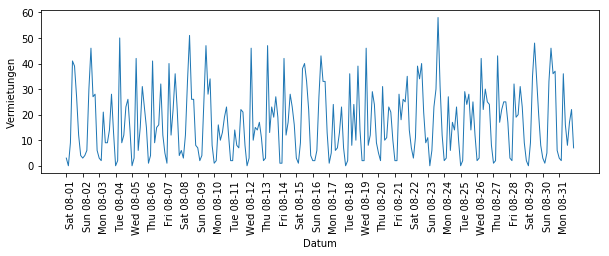

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Datum")
plt.ylabel("Vermietungen")

In [4]:
y = citibike.values
X = citibike.index.astype("int64").values.reshape(-1, 1)
X[:5,:]

array([[1438387200000000000],
       [1438398000000000000],
       [1438408800000000000],
       [1438419600000000000],
       [1438430400000000000]])

In [5]:
import numpy as np
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]  
    regressor.fit(X_train, y_train)
    print("Testdatensatz R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    
    plt.plot(range(n_train), y_train, label="Training")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="Test")
    plt.plot(range(n_train), y_pred_train, '--', label="Vorhersage Training")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="Vorhersage Test")
    
    plt.legend(loc=(1.01,0))
    plt.xlabel("Datum")
    plt.ylabel("Vermietungen")

Testdatensatz R^2: -0.04


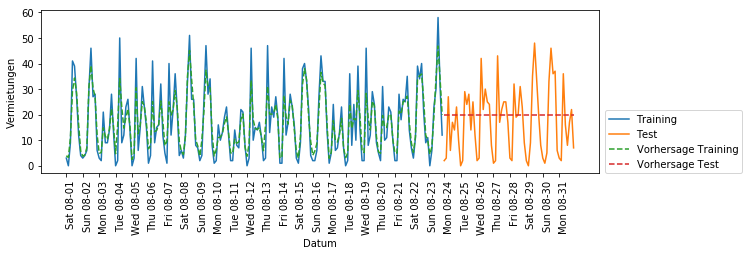

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state=0)
eval_on_features(X, y, regressor)

Testdatensatz R^2: 0.60


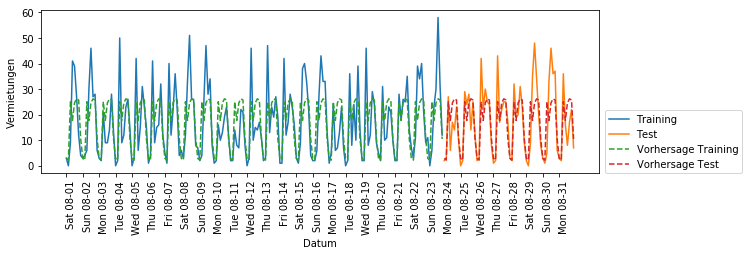

In [11]:
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour, y, regressor)

Testdatensatz R^2: 0.84


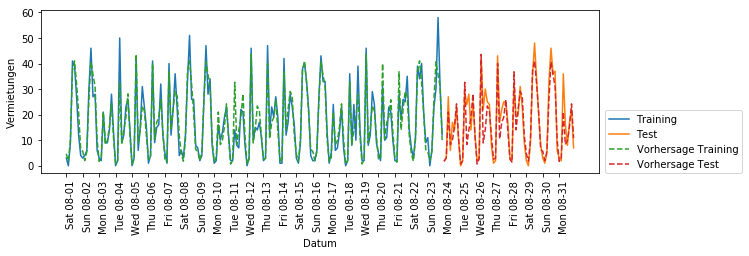

In [15]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),
                        citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week, y, regressor)

Testdatensatz R^2: 0.13


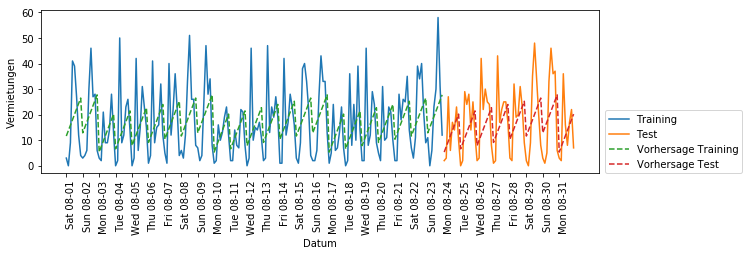

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
eval_on_features(X_hour_week, y, lr)

Testdatensatz R^2: 0.62


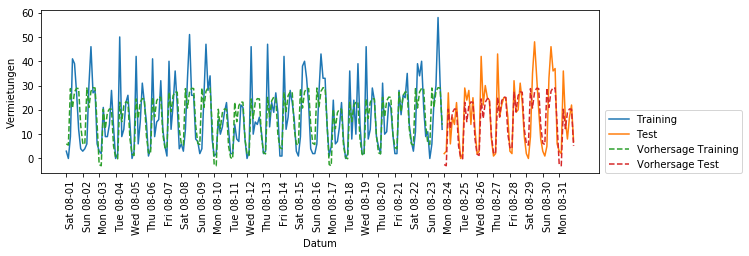

In [17]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, lr)

Testdatensatz R^2: 0.85


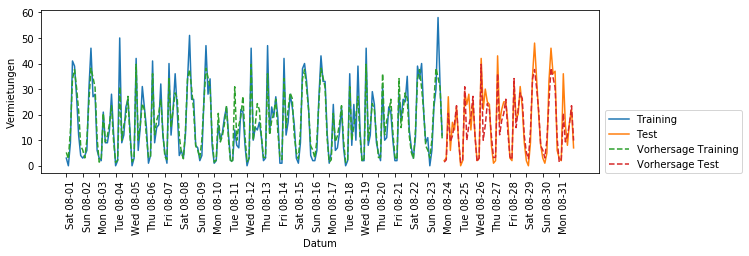

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
ridge = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, ridge)

In [19]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour
print("hour: {}\n day: {}".format(hour, day))

hour: ['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']
 day: ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


In [29]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[ridge.coef_!=0]
coef_nonzero = ridge.coef_[ridge.coef_ != 0]

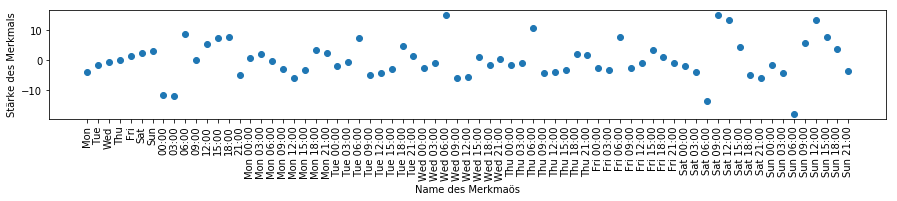

In [31]:
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.ylabel("Stärke des Merkmals")
plt.xlabel("Name des Merkmaös")